In [1]:
using Revise
using LinearAlgebra
using AdaptiveTransportMap
using Statistics
using Distributions
using Test
using ForwardDiff
using SpecialFunctions
using OrthoMatchingPursuit
using BenchmarkTools

┌ Info: Precompiling AdaptiveTransportMap [bdf749b0-1400-4207-80d3-e689c0e3f03d]
└ @ Base loading.jl:1278
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been

In [2]:
using Plots
default(tickfont = font("CMU Serif", 9), 
        titlefont = font("CMU Serif", 14), 
        guidefont = font("CMU Serif", 12),
        legendfont = font("CMU Serif", 10),
        grid = false)
# pyplot()

using LaTeXStrings

In [17]:
Nx = 10
Ne = 1000

# Create a diagonally banded tridiaogonal
Σ = SymTridiagonal(rand(Nx), 0.05*rand(Nx-1))
@assert isposdef(Symmetric(Matrix(Σ))) "Σ is not positive definite"
Lx = cholesky(Symmetric(inv(Σ))).L
πX = MvNormal(zeros(Nx), Symmetric(Σ))
X = rand(πX, Ne)
Xvalid = rand(πX, Ne)
λ = 0.0
δ = 1e-8
γ = 2.0

2.0

In [18]:
@time S = SparseRadialMap(X, -1; γ = γ, λ = λ, δ = δ)

  0.000079 seconds (334 allocations: 27.953 KiB)


Sparse Radial Map of dimension Nx = 10 and order p = [[-1], [-1, -1], [-1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]
        with parameters (γ, λ, δ, κ) = (2.0, 0.0, 1.0e-8, 10.0)


In [19]:
optimize(S, X, 2, 1, "kfolds"; verbose = true)

Fold 1:
Active dimensions: [1] - Training error: 0.49045030844896154, Validation error: 0.5375147199725477
Fold 2:
Active dimensions: [1] - Training error: 0.49307260558462396, Validation error: 0.5258548535565475
Fold 3:
Active dimensions: [1] - Training error: 0.5045616188146141, Validation error: 0.4804202904486742
Fold 4:
Active dimensions: [1] - Training error: 0.506805276674596, Validation error: 0.4719987204992121
Fold 5:
Active dimensions: [1] - Training error: 0.49881264182884255, Validation error: 0.5021732032737989
Optimization on the entire data set:
Active dimensions: [1] - Training error: 0.4992222949095903
Fold 1:
Active dimensions: [2] - Training error: 0.49865863439505936, Validation error: 0.5034548973166362
Active dimensions: [1, 2] - Training error: 0.49300943250296947, Validation error: 0.5026662049574738
Fold 2:
Active dimensions: [2] - Training error: 0.4800569620102052, Validation error: 0.5817525761394049
Active dimensions: [1, 2] - Training error: 0.4739832524

Active dimensions: [1, 2, 3, 5, 6] - Training error: 0.41893131191729654, Validation error: 0.41109913905518436
Active dimensions: [1, 2, 3, 4, 5, 6] - Training error: 0.41769269643211215, Validation error: 0.41314379135693446
Fold 2:
Active dimensions: [6] - Training error: 0.5042664469973175, Validation error: 0.47689417936670836
Active dimensions: [5, 6] - Training error: 0.4227437098025555, Validation error: 0.40779806526100965
Active dimensions: [3, 5, 6] - Training error: 0.4220940569969853, Validation error: 0.40265237410932786
Active dimensions: [3, 4, 5, 6] - Training error: 0.41953707782416433, Validation error: 0.41110391710511873
Active dimensions: [1, 3, 4, 5, 6] - Training error: 0.4188733553593888, Validation error: 0.4121896983574106
Active dimensions: [1, 2, 3, 4, 5, 6] - Training error: 0.41776828067205024, Validation error: 0.41019840605693947
Fold 3:
Active dimensions: [6] - Training error: 0.4978701176174129, Validation error: 0.5012558933624223
Active dimensions: 

Active dimensions: [4, 5, 6, 7, 8] - Training error: 0.4022530418268414, Validation error: 0.4463639668636885
Active dimensions: [3, 4, 5, 6, 7, 8] - Training error: 0.400366537094989, Validation error: 0.4479027149351565
Active dimensions: [1, 3, 4, 5, 6, 7, 8] - Training error: 0.39981982658802595, Validation error: 0.45035234653198436
Active dimensions: [1, 2, 3, 4, 5, 6, 7, 8] - Training error: 0.39878347554175675, Validation error: 0.4442529366149421
Fold 4:
Active dimensions: [8] - Training error: 0.48010359463408087, Validation error: 0.5790190636247746
Active dimensions: [7, 8] - Training error: 0.4208369933975189, Validation error: 0.5214199219611043
Active dimensions: [6, 7, 8] - Training error: 0.4017619407872728, Validation error: 0.4769139697528709
Active dimensions: [4, 6, 7, 8] - Training error: 0.40132821537295743, Validation error: 0.478534423616075
Active dimensions: [2, 4, 6, 7, 8] - Training error: 0.39722012299990794, Validation error: 0.4833532460761202
Active dim

Active dimensions: [3, 4, 10] - Training error: 0.4909922022305906, Validation error: 0.5246355475358572
Active dimensions: [3, 4, 9, 10] - Training error: 0.48436985109135755, Validation error: 0.5395975909558897
Active dimensions: [3, 4, 8, 9, 10] - Training error: 0.4836943260502448, Validation error: 0.5364274593998016
Active dimensions: [3, 4, 6, 8, 9, 10] - Training error: 0.4833828772614334, Validation error: 0.5352861360670137
Active dimensions: [1, 3, 4, 6, 8, 9, 10] - Training error: 0.48132996941159173, Validation error: 0.5369970399965335
Active dimensions: [1, 3, 4, 5, 6, 8, 9, 10] - Training error: 0.48095177669174305, Validation error: 0.5410158993974185
Active dimensions: [1, 3, 4, 5, 6, 7, 8, 9, 10] - Training error: 0.47953081801051445, Validation error: 0.5422056214549306
Active dimensions: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] - Training error: 0.4791859828583337, Validation error: 0.5429009156843092
Fold 5:
Active dimensions: [10] - Training error: 0.4944506233320316, Va

Sparse Radial Map of dimension Nx = 10 and order p = [[1], [2, 1], [-1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, -1, 1], [-1, -1, -1, -1, 2, 1], [-1, -1, -1, 2, 2, 2, 1], [-1, -1, -1, 2, -1, 2, 2, 1], [-1, -1, -1, 2, -1, -1, -1, 2, 1], [2, -1, -1, -1, -1, -1, -1, -1, -1, 1]]
        with parameters (γ, λ, δ, κ) = (2.0, 0.0, 1.0e-8, 10.0)


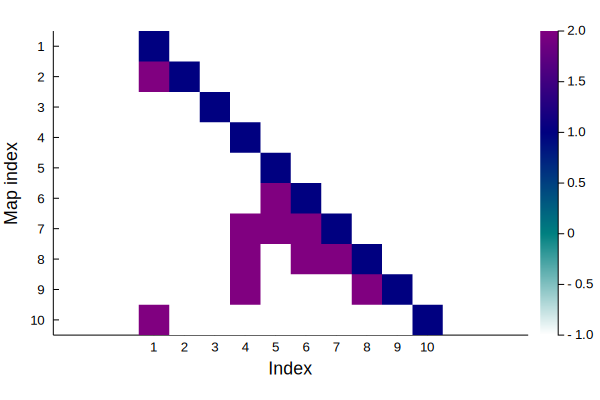

In [20]:
plot(S)